# 1. Missing Values

In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this mission, we'll explore how to use correlation between features and the target column, correlation between features, and variance of features to select features. We'll continue working with the same housing dataset from the last mission.

We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like Year Built and Year Remod/Add). We'll explore how to deal with both of these in a later mission in this course.

To start, let's look at which columns fall into either of these two categories.

In [37]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [38]:
numerical_train = train.select_dtypes(include=['int64', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


# 2.  Correlating Feature Columns With Target Column

In the last mission, we selected the feature for the simple linear regression model by comparing how some of the features correlate with the target column. If you recall, we focused on 4 features in particular and used the pandas.DataFrame.corr() method to return the correlation coefficients between each pairs of columns. This means that the correlation matrix for 4 columns results in 16 correlation values:

    train[['GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']].corr()
                 GarageArea  GrLivArea  OverallCond  SalePrice
    GarageArea     1.000000   0.468997    -0.151521   0.623431
    GrLivArea      0.468997   1.000000    -0.079686   0.708624
    OverallCond   -0.151521  -0.079686     1.000000  -0.077856
    SalePrice      0.623431   0.708624    -0.077856   1.000000

The subset of features we want to focus on, full_cols_series, contains 27 columns:

    len(full_cols_series)
    27

The resulting correlation matrix will contain 27 * 27 or 729 correlation values. Comparing and contrasting this many values is incredibly difficult. 

**Let's instead focus on just how the feature columns correlate with the target column (SalePrice) instead.**

In [39]:
# select columns which had 0 in full_cols_series!!! This is creative!!!
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()

sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

# 3. Correlation Matrix Heatmap

We now have a decent list of candidate features to use in our model, sorted by how strongly they're correlated with the SalePrice column. **For now, let's keep only the features that have a correlation of 0.3 or higher.** This cutoff is a bit arbitrary and, **in general, it's a good idea to experiment with this cutoff.** For example, you can train and test models using the columns selected using different cutoffs and see where your model stops improving.

**The next thing we need to look for is for potential collinearity between some of these feature columns. <font color='red'>Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we need to choose just one or predictive accuracy can suffer.</font>**


While we can check for collinearity between 2 columns using the correlation matrix, we run the risk of information overload. We can instead generate a correlation matrix heatmap using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations. Because we're looking for outlier values in the heatmap, this visual representation is easier.

Here's what the example correlation matrix heatmap looks like from the documentation:

![](correlation_heatmap_matrix.png)

To generate a correlation matrix heatmap, we need to pass in the data frame containing the correlation matrix as a data frame into the **seaborn.heatmap() function.**

**Instructions**
- Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
- Use the seaborn.heatmap() function to generate a correlation matrix heatmap for the columns in strong_corrs.


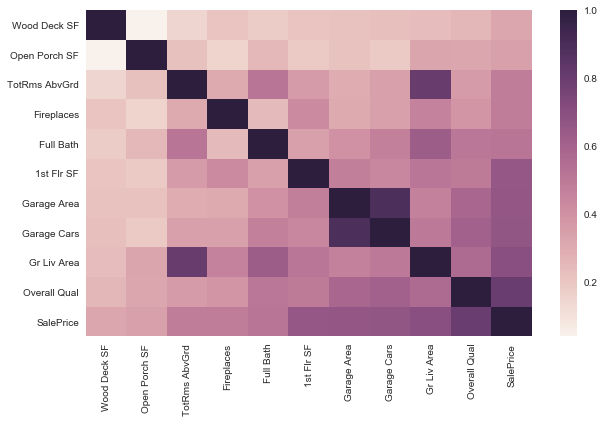

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)
plt.show()

# 4. Train and Test Model

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

- Gr Liv Area and TotRms AbvGrd
- Garage Area and Garage Cars

If we read the descriptions of these columns from the data documentation, we can tell that each pair of column reflects very similar information. **Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.**

The last thing we'll need to do is confirm that the test set contains no missing values for these columns:

    final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
    
    test[final_corr_cols.index]
    class 'pandas.core.frame.DataFrame'
    RangeIndex: 1470 entries, 1460 to 2929
    Data columns (total 9 columns):
    Wood Deck SF     1470 non-null int64
    Open Porch SF    1470 non-null int64
    Fireplaces       1470 non-null int64
    Full Bath        1470 non-null int64
    1st Flr SF       1470 non-null int64
    Garage Area      1469 non-null float64
    Gr Liv Area      1470 non-null int64
    Overall Qual     1470 non-null int64
    SalePrice        1470 non-null int64
    dtypes: float64(1), int64(8)
    memory usage: 103.4 KB

**Looks like the test set has one pesky row with a missing value for Garage Area.** Let's just drop this row for now. Finally, let's train and test a model using these columns to see how they fare.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.9762919
41032.0261202


# 5. Removing Low Variance Features

The last technique we'll explore is removing features with low variance. <font color='red'>When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same.</font> This means that the column isn't informative and isn't going to help the model make better predictions.

**To make apples to apples comparisions between columns, we need to standardize all of the columns to vary between 0 and 1. Then, we can set a cutoff value for variance and remove features that have less than that variance amount.**

In [42]:
unit_train = train[features]/(train[features].max())
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Gr Liv Area      0.018014
Full Bath        0.018621
1st Flr SF       0.019182
Overall Qual     0.019842
Garage Area      0.020347
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


# 6. Final Model

To wrap up this mission, let's set a cutoff variance of 0.015, remove the Open Porch SF feature, and train and test a model using the remaining features.

In [43]:
features = features.drop(['Open Porch SF'])

clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.6967078
40591.4270244


# 7. Next Steps
We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. This is most likely the furthest we can go without transforming and utilizing the other features in the dataset so we'll stop here for now. In the next 2 missions, we'll explore 2 different ways of fitting models. Afterwards, we'll explore ways to clean and engineer new features from the existing features to improve model accuracy even further.
